# 2.7 Recovery of affine and metric properties from images

## **사영 왜곡된 이미지에서 닮음 속성을 복원하기 위한 방법**

평면에 projection되어 있는 이미지에서 사영 왜곡을 제거하면 각도, 길이 비율과 같은 similarity properties를 원래 평면에서 측정할 수 있으며, 4개의 대응점을 지정하여 자유도 8인 사상 변환 H를 계산해 사영 왜곡을 완전히 제거할 수 있습니다.

그러나 similarity transformation은 projective tranformation에 비해 dof가 4개 더 적습니다. 따라서 4 dof만 지정하여도 similarity 속성을 측정할 수 있습니다.

사영 왜곡된 이미지에서 닮음 속성을 복원하기 위한 4개의 자유도는 line at infinity $l_\infty$(자유도 2)와 $l_\infty$에 있는 두 개의 원형점($circular\ points$, 자유도 2)이라는 물리적 실체로 주어지며, 이러한 연관성을 이용하는 것이 행렬 분해에서 나타나는 행렬을 지정하는 방식보다 문제를 더 직관적으로 해결할 수 있습니다.

이미지에서 $l_\infty$가 결정되면 사영 왜곡을 제거할 수 있고, $circular \ points$가 결정되면 아핀 왜곡을 제거할 수 있습니다. 그러면 남은 왜곡은 similarity 뿐이므로, 이미지에서 similarity 속성을 측정할 수 있습니다.

## **2.7.1 The line at infinity**

사영 변환에 의해 왜곡된 이미지에서 무한선(the line at infinity) $l_\infty$을 식별하면 아핀 속성을 복원할 수 있습니다. 이는 line at infinity $l_\infty$이 사영 변환 H에 고정된다는 것이 H가 아핀 변환인 것과 필요충분조건이기 때문입니다.

<img src="figures/ch2_7_figure1.png" style="width: 800px;"/>
<br>
<img src="figures/ch2_7_figure1-2.png" style="width: 600px;"/>

<br>

## 2.7.2 Recovery of affine properties from images

사영 변환에 의해 왜곡된 이미지에서 line at infinity $l_\infty$을 식별하여 line at infinity의 표준 위치인 $(0, 0, 1)^T$로 보내는 변환을 적용하면, Result 2.17.에 의해 이미지에 적용된 변환은 아핀 변환임을 보일 수 있습니다.

즉 이미지의 아핀 속성을 복원한 것입니다. 다음 그림에서 이 핵심 아이디어에 대해 잘 설명하고 있습니다. 그렇다면 사영 변환에 의해 왜곡된 이미지에서의 line at infinity $l_\infty$을 식별하는 방법은 무엇이 있을까요?

이 책에서는 2가지 방법을 소개합니다.
1. 평행선의 교점을 이용한 방법
2. 길이 비율을 이용한 방법

위 두 가지 중 저희는 1번 방법에 대한 실습을 함께 제공합니다.

# Affine rectification
아래 이미지는 3가지의 평면과 그 사이에서의 일어날 수 있는 2가지 변환으로 아핀 속성이 보정되는 과정을 보입니다.
3가지 평면은 왼쪽부터 순차적으로 아래와 같은 평면을 나타냅니다.
1. 실제 세계에서 왜곡 없이 평면으로 사영된 평면 $\pi_1$,
2. projective transformation에 대해 변환되어 사영된 평면 $\pi_2$,
3. $\pi_2$에서 아핀 속성을 복원한 $\pi_3$

또한, $H_P$는 projective transformation, $H_A$는 Affine transformation 입니다.

<img src="figures/ch2_7_figure3.png" style="width: 600px;"/>


위 그림에서 알 수 있는 것은 2가지입니다.
1. projective transform에 의해 왜곡된 이미지에서 line at infinity $l_\infin$을 식별하여 affine 속성을 복원해 평행인 것을 평행으로 만들 수 있다는 것
2. 위와 같이 복원된 평면은 원본과 affine transforation의 관계를 가진다는 것


### **평행선의 교점을 이용한 방법**



실세상 평면의 line at infinity는 원근 이미지에서 평면의 vanishing line이 됩니다. 다음 그림에서 나와있듯이, vanishing line $l$은 이미지에서 평행선의 교점에서 계산할 수 있습니다.

<img src="figures/ch2_7_figure4.png" style="width: 700px;"/>


vanishing line을 식별하는 방법을 요약해보겠습니다.
1. 실제 세계에서는 평행한 두 직선을 2 pair 찾습니다.
2. 외적을 이용해서 각 쌍에 존재하는 두 직선의 접점을 계산합니다.
3. 위 과정을 통해 구한 2개의 접접의 외적을 이용해 선의 좌표 계산합니다.

아래 실습 코드가 있습니다.

In [3]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

In [4]:
img = cv2.imread('./figures/chessboard.jpg', cv2.IMREAD_COLOR)

st = [np.array([1381,  969]), np.array([1719,  392]), np.array([337, 711]), np.array([1382,  968])]
ed = [np.array([338, 711]), np.array([786, 195]), np.array([786, 194]), np.array([1719,  392])]
# Homogeneous vectorize
st = np.append(st, np.ones((4,1), dtype=np.int32), axis=1)
ed = np.append(ed, np.ones((4,1), dtype=np.int32), axis=1)

# Compute vanishing point Vx
Vx = np.cross(np.cross(st[0], ed[0]),np.cross(st[1], ed[1]))
Vx = Vx/Vx[2]

# Compute vanishing point Vy
Vy = np.cross(np.cross(st[2], ed[2]),np.cross(st[3], ed[3]))
Vy = Vy/Vy[2]

# Compute vanishing line Vl
Vl = np.cross(Vx,Vy)
Vl = Vl/Vl[2]
print('Vanishing line : ', Vl)

# compute affine rectification matrix
H_A = np.eye(3)
H_A[2] = Vl

# recover the affine properties
recovered_img = cv2.warpPerspective(img, H_A, (0,0))

concat = np.concatenate([img, recovered_img], axis=1)
plt.imshow(concat)

Vanishing line :  [6.61317266e-07 2.85906628e-04 1.00000000e+00]


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\imgwarp.cpp:3274: error: (-215:Assertion failed) _src.total() > 0 in function 'cv::warpPerspective'



### **길이 비율이 알려진 두 개의 간격을 이용한 방법**

또는 길이 비율이 알려진 두 개의 간격이 주어지면 소실점을 결정할 수 있습니다. 일반적인 경우는 이미지의 한 직선에서 세 점이 식별된 경우입니다.
 $a, b, c$가 실세계에서 대응하는 같은 선상의 점이고, 길이 비율 $d(a,b) : d(b, c) = a : b$가 알려져 있다고 가정합니다. 교차 비율을 사용하면 소실점을 찾아낼 수 있습니다.
 
<img src="figures/ch2_7_figure5.png" style="width: 700px;"/>
<br>

1. 이미지에서 거리 비율 $d(a', b') : d(b', c') = a' : b'$을 측정합니다.
2. 점 $a, b, c$를 직선 $<a, b, c>$상의 좌표계에서 좌표 $0, a, a + b$로 표기합니다. 계산을 위해 이러한 점들을 2차원 동차 벡터 $(0, 1)^T, (a, 1)^T, (a+b, 1)^T$로 표시합니다. 같은 방법으로 $a', b', c'$는 좌표 $0, a', a'+b'$을 가지고 동차 벡터로 표시할 수 있습니다.
3. 위의 두 좌표계를 이용해 $a\mapsto a', b\mapsto b', c\mapsto c'$으로 가는 1차원 사영변환 $H_\mathbf{2x2}$를 계산합니다.
4. $H_\mathbf{2x2}$에 의한 무한점의 이미지가 $<a', b', c'>$의 소실점이 됩니다.

<br>

## 2.7.3 The circular points and their dual

사영 왜곡된 이미지에서 원형점(the circular points) $I, J$를 식별하면 닮음 속성을 복원할 수 있습니다. 이는 원형점 $I, J$가 사영 변환 H에 고정된다는 것이 H가 닮음 변환인 것과 필요충분조건이기 때문입니다.

<img src="figures/ch2_7_figure6.png" style="width: 800px;"/>
<br>

<img src="figures/ch2_7_figure6-2.png" style="width: 600px;"/>
<br>

### **원형점에 대한 원뿔 쌍대**

사영 왜곡된 이미지에서 원형점에 대한 원뿔 쌍대 $C^*_\infty$를 식별하여도 닮음 속성을 복원할 수 있습니다. 이는 $C^*_\infty$가 사영 변환 H에 고정된다는 것이 H가 닮음 변환인 것과 필요충분조건이기 때문입니다. 

<img src="figures/ch2_7_figure7.png" style="width: 800px;"/>
<br>
<br>
※ 원형점에 대한 원뿔 쌍대 $C^*_\infty$는 다음과 같이 주어집니다.

$C^*_\infty = IJ^T + JI^T$

<br>

## 2.7.4 Angles on the projective plane

사영 평면에서 $C^*_\infty$을 결정하면 다음과 같은 방법으로 유클리드 각을 측정할 수 있습니다.

<br>

<img src="figures/ch2_7_figure8.png" style="width: 400px;"/>

<br>

위 수식은 사영 변환에서 불변량이며, $l^TC^*_\infty m = 0$이면 직선 $l$과 $m$은 직교합니다.

<br>


## 2.7.5 Recovery of metric properties from images

원형점을 표준 위치 $(1, \pm i, 0)^T$로 변환하면 사영 왜곡된 이미지에서 거리 속성을 복원할 수 있습니다. 그리고 Result 2.21.에 의해 실세상 평면과 복원된 이미지 사이의 변환이 닮음 변환임을 보일 수 있습니다.
<br>
### $C^*_\infty$**를 사용한 거리 보정**

다음과 같이 $C^*_\infty$를 이용하여 사영 변환의 닮음 왜곡을 제외하고 사영과 아핀 구성 행렬을 모두 결정할 수 있습니다.
<br>
<img src="figures/ch2_7_figure9.png" style="width: 700px;"/>
<br>

### **아핀 왜곡된 이미지에서 거리 속성 복원**

이미지가 아핀 보정이 됐다고 가정하면, 거리 보정을 위해 원형점의 자유도 2를 결정하는 제약 조건 2개가 필요합니다. 실세상 평면에서 직각인 두 개의 이미지에서 제약 조건을 얻을 수 있습니다.

아핀 정정 이미지의 직선 $l', m'$이 실세계에서 직교하는 선 $l, m$에 대응한다고 가정하면 $l'^TC^*_\infty m = 0, \mathbf{v} = \mathbf{0}$을 이용할 수 있고, 바로 위에서 언급된 $C^*_\infty$’에 대한 공식을 다음과 같이 정리할 수 있습니다.

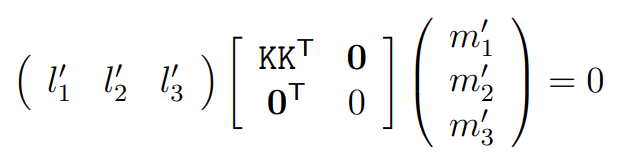

이것은 2 X 2 행렬 $\mathbf{S} = KK^T$에 대한 선형 제약조건이다. 행렬 $\mathbf{S}$는 대칭이므로 3개의 독립 원소를 가지며, scaling은 중요하지 않으므로 자유도는 2입니다.

따라서 두 선의 직교 조건은 $(l'_1m'_1, l'_1m'_2 + l'_2m'_1, l'_2m'_2)\mathbf{s} = 0$으로 표기할 수 있습니다. 이러한 방식으로 두 개의 직교하는 선 쌍에서 제약조건 두 개를 얻으면, Cholesky Decomposition을 이용하여 $K$를 구해낼 수 있고, $C^*_\infty$’를 계산할 수 있습니다.

아래 해당 코드를 첨부합니다.

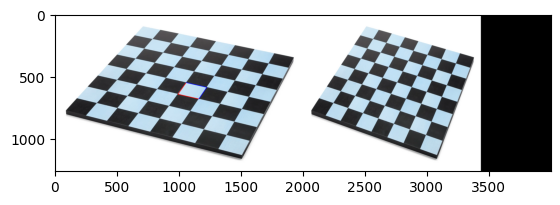

In [16]:
img = cv2.imread('./figures/chessboard.jpg', cv2.IMREAD_COLOR)

# select two orthogonal pairs
st = [np.array([1157,  676]), np.array([989, 638]), np.array([1055,  544]), np.array([1221,  582])]
ed = [np.array([989, 638]), np.array([1055,  544]), np.array([1221,  582]), np.array([1157,  676])]
st = np.append(st, np.ones((4,1), dtype=np.int32), axis=1)
ed = np.append(ed, np.ones((4,1), dtype=np.int32), axis=1)

l1 = np.cross(st[0], ed[0])
l2 = np.cross(st[1], ed[1])

m1 = np.cross(st[2], ed[2])
m2 = np.cross(st[3], ed[3])

# constraints
ortho_constraint = np.array([[l1[0]*m1[0], l1[0]*m1[1]+l1[1]*m1[0], l1[1]*m1[1]],
                            [l2[0]*m2[0], l2[0]*m2[1]+l2[1]*m2[0], l2[1]*m2[1]]
                            ])

# decompose orthogonal constraint using SVD to gain S
U,S,V = np.linalg.svd(ortho_constraint, full_matrices=True)
S_matrix = np.diag(S)

# S = KK^T
# decompose S using Cholesky decomposition to gain K
K = np.linalg.cholesky(S_matrix)
K = K/K[1][1]

# Compute metric rectification matrix
H_m = np.eye(3)
H_m[:2,:2] = K
H_m = np.linalg.inv(H_m)

# recover the metric properties
dst = cv2.warpPerspective(img, H_m*H_A, (0,0))

cv2.line(img, st[0][:2], ed[0][:2], (255,0,0),3)
cv2.line(img, st[1][:2], ed[1][:2], (255,0,0),3)

cv2.line(img, st[2][:2], ed[2][:2], (0,0,255),3)
cv2.line(img, st[3][:2], ed[3][:2], (0,0,255),3)


concat = np.concatenate([img, dst], axis=1)
plt.imshow(concat)

# 각도 측정 코드

위 보정된 이미지에서 좌표를 찍어 측정해본 결과입니다.

81.7667263783753


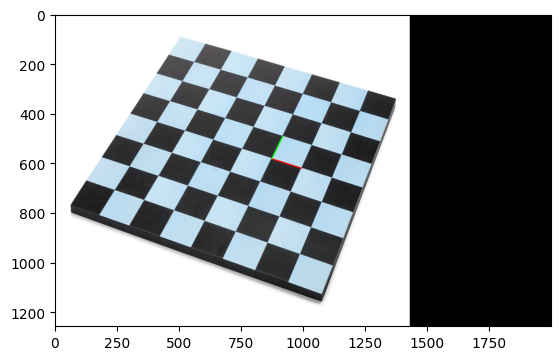

In [15]:
st = [np.array([992, 621]), np.array([872, 583])]
ed = [np.array([872, 583]), np.array([916, 492])]
st = np.append(st, np.ones((2,1), dtype=np.int32), axis=1)
ed = np.append(ed, np.ones((2,1), dtype=np.int32), axis=1)

conic = np.array([[1,0,0],
                  [0,1,0],
                  [0,0,0]])

l = np.cross(st[0], ed[0])
l = l/l[2]
m = np.cross(st[1], ed[1])
m  = m/m[2]

# calulate the angle using conic
cos_theta = l.T@conic@m
val = np.sqrt((l.T@conic@l)*(m.T@conic@m))
cos_theta = cos_theta / val

theta = np.arccos(cos_theta) * 180 / np.pi
print('angle between l and m : ', theta)


cv2.line(dst, st[0][:2], ed[0][:2], (255,0,0),3)
cv2.line(dst, st[1][:2], ed[1][:2], (0,255,0),3)

plt.imshow(dst)


### **원본 이미지에서 거리 속성 복원**


아핀 왜곡된 이미지에서 거리 속성 복원한 위 사례와 유사하게,  원본 이미지에서 바로 거리 속성을 복원할 수 있습니다. 직선 $l$과 $m$을 실세상 평면에서 직교하는 직선의 이미지로 가정하면 $l'^TC^*_\infty m = 0$을 이용할 수 있고, 다음과 같이 $C^*_\infty$에 대한 선형 제약 조건을 얻습니다.

<br>
<img src="figures/ch2_7_figure11.png" style="width: 800px;"/>
<br>

여기에서 
$\mathbf{c} = (a, b, c, d, e, f)^T$는 6차원 벡터로 표기한 $C^*_\infty$의 원뿔 행렬입니다. 이러한 제약조건 5개로 5 X 6 행렬을 만들면 $\mathbf{c}$는 ($C^*_\infty$) null vector가 됩니다. 따라서 $C^*_\infty$는 실세계에서 직교하는 다섯 선 쌍에서 선형적으로 결정할 수 있습니다.
<br>

### **계층화**

$C^*_\infty$ 를 식별하여 원본 이미지에서 아핀 왜곡과 사영 왜곡을 한 번에 정정하는 방법을 배웠습니다. 그리고 사영 왜곡을 먼저 제거하고 아핀 왜곡을 제거하는 방법도 배웠습니다. 이러한 2단계 접근 방식을 계층화라고 합니다. 비슷한 접근 방식을 3차원에서도 적용할 수 있습니다.

### Reference
1. Multiple view geometry in computer vision chapter 2.7